# Chapter 2: Fourier methods for periodic functions

Here we discuss
1.  Fourier series
2.  Trigonometric interpolation via truncated Fourier expansions 
3.  The Fast Fourier Transform
4.  Interpolation and differentiation in value space and coefficient space
5.  Examples of computing solutions to advection / transport PDEs
6.  The accuracy of trigonometric interpolation and differentiation

## Fourier series

We assume that $f$ is $2\pi$-periodic and its Fourier series converges on $x \in [0, 2\pi)$, i.e.,
$$
f(x) = \sum_{k=-\infty}^{\infty} c_k \mathrm{e}^{\mathrm{i} k x}.
$$
Later in this chapter we'll consider some conditions under which Fourier series converge. The exponentials $\mathrm{e}^{\mathrm{i} k x} = \cos kx + {\rm i} \sin kx$ are sometimes referred to as *Fourier modes*.

**Proposition (orthogonality of Fourier modes)** We have that
$$
\frac{1}{2\pi}\int_{0}^{2\pi} \mathrm{e}^{\mathrm{i} k x} \mathrm{e}^{\mathrm{i} \ell x} {\rm d}x = \delta_{k\ell} = \begin{cases}
1 & \text{if } \ell = -k \\
0 & \text{if } \ell \neq k
\end{cases}.
$$

Hence the *Fourier coefficients* are defined as
$$
%c_k = \frac{1}{2\pi}\int_{-\pi}^{\pi} f(x) \mathrm{e}^{-\mathrm{i}k x} \mathrm{d} x.
c_k = \frac{1}{2\pi}\int_{0}^{2\pi} f(x) \mathrm{e}^{-\mathrm{i}k x} \mathrm{d} x.
$$
One can think of the Fourier mode $\mathrm{e}^{\mathrm{i} k x}$ as representing a wave of frequency $\vert k \vert$ and the Fourier coefficient $c_{k}$ can be thought of as the amplitude of the wave $\mathrm{e}^{\mathrm{i} k x}$.

Suppose we only know the values of $f(x)$ at the $n$ equally spaced points $x_{j} = jh = \frac{2\pi j}{n}$ for $j = 0, \ldots, n-1$, can we somehow use Fourier series to approximate $f$ and its derivatives?

The idea is to use a truncated Fourier series and approximate Fourier coefficients $\tilde{c}^n_k$ to approximate $f$ with
$$
f(x) \approx \sum_{k=-(n-1)/2}^{(n-1)/2} \tilde{c}^n_k \mathrm{e}^{\mathrm{i} k x},
$$
assuming $n$ is odd.  As you might guess, later in this chapter we'll use this approximation to compute solutions to a PDE.

## Trapezoidal rule

We are going to approximate the Fourier coefficients $c_k$ by using the *trapezoidal rule*.

**Definition (Trapezoidal rule / method):** Let $x_{j}$, $j = 0, \ldots, n$ be $n+1$ equally spaced points on the interval $[a, b]$. Hence, $x_j = a + jh$ with $h = (b-a)/n$. The $n+1$-point trapezoidal rule for approximating the integral 
$$
I[g] = I[g(x)] = \int_{a}^{b} g(x) \mathrm{d} x 
$$
is denoted by $I_n[g]$ and defined as
$$
I_n[g] = I_n[g(x)] := \frac{h}{2}\left(g(x_0) + 2g(x_1) + 2g(x_2) + \cdots + 2g(x_{n-1}) + g(x_{n})    \right)
$$
The trapezoidal rule is an example of a quadrature method, which are methods to approximate integrals by weighted sums (here we make the approximation $I[g] \approx I_n[g]$).

**Note:** For the rest of this chapter, we set $a = 0$ and $b  = 2\pi$, i.e., $x_j = jh$ with $h = 2\pi/n$.

Let's use the trapezoidal rule to approximate the Fourier coefficients: 
$$
\begin{eqnarray*}
c_k &=& \frac{1}{2\pi}\int_{0}^{2\pi} f(x) \mathrm{e}^{-\mathrm{i}k x} \mathrm{d} x \\
    &=& I\left[\frac{f(x) \mathrm{e}^{-\mathrm{i}k x}}{2\pi}   \right] \\
    &\approx & I_{n}\left[\frac{f(x)\mathrm{e}^{-\mathrm{i}k x}}{2\pi}\right]  \\
    &=& \frac{1}{n}\sum_{j = 0}^{n-1} f(x_j)\mathrm{e}^{-\mathrm{i}kx_j} \\
    &:=& \tilde{c}^n_k
\end{eqnarray*}
$$

Here we used the fact that $g(x) = \frac{f(x)\mathrm{e}^{-\mathrm{i}k x}}{2\pi}$ is a $2\pi$-periodic function (since $f(x)$ is assumed to be $2\pi$-periodic), hence it follows that $g(x_0) = g(x_0 + 2\pi) = g(x_n)$.

**Lemma (discrete orthogonality of Fourier modes)** For $x_j = jh = \frac{2\pi j}{n}$, we have
$$
I_n\left[\frac{\mathrm{e}^{\mathrm{i}kx}}{2\pi}\right] = \frac{1}{n}\sum_{j = 0}^{n-1} \mathrm{e}^{\mathrm{i}kx_j} = \begin{cases}
1 & \text{if } k = \ldots, -2n, -n, 0, n, 2n, \ldots \quad (\text{i.e., }  k = 0\: ({\rm{mod }}\:n)) \\
0 & \text{otherwise}
\end{cases},
$$
therefore
$$
I_n\left[\frac{\mathrm{e}^{\mathrm{i}(k-\ell)x}}{2\pi}\right] = \frac{1}{n}\sum_{j = 0}^{n-1} \mathrm{e}^{\mathrm{i}(k-\ell)x_j} = \begin{cases}
1 & \text{if } k-\ell = \ldots, -2n, -n, 0, n, 2n, \ldots \quad  (k = \ell\: ({\rm{mod }}\:n)) \\
0 & \text{otherwise}
\end{cases}.
$$
**Proof** Case 1: $k = np$, $p \in \mathbb{Z}$, then
$$
\sum_{j = 0}^{n-1} \mathrm{e}^{\mathrm{i}kx_j} = \sum_{j = 0}^{n-1} \mathrm{e}^{2\pi\mathrm{i}kj/n} = \sum_{j = 0}^{n-1} \mathrm{e}^{2\pi\mathrm{i}pj} = \sum_{j = 0}^{n-1} 1 = n.
$$
Case 2: $k \neq np$, $p \in \mathbb{Z}$, then
$$
\sum_{j = 0}^{n-1} \mathrm{e}^{\mathrm{i}kx_j} = \sum_{j = 0}^{n-1} \left(\mathrm{e}^{2\pi\mathrm{i}k/n}\right)^{j} = \frac{1-\left(\mathrm{e}^{2\pi\mathrm{i}k/n}\right)^{n}}{1-\mathrm{e}^{2\pi\mathrm{i}k/n}} = 0,
$$
where we have used the formula
$$
\sum_{j = 0}^{n-1} z^{j} = \frac{1-z^n}{1-z},\qquad z \neq 1,
$$
and the fact that $\mathrm{e}^{2\pi\mathrm{i}k/n} \neq 1$ since $k \neq np$.  $\blacksquare$

## Aliasing error formula

**Corollary** The approximate Fourier coefficients $\tilde{c}^n_k$ and the exact Fourier coefficients $c_k$ are related as follows,
$$
\tilde{c}^n_k = \cdots + c_{k-2n} + c_{k-n} +  c_k +  c_{k+n} + c_{k+2n} + \cdots,
$$
which is known as the aliasing formula.

**Proof**  We have
$$
\begin{eqnarray*}
  \tilde{c}^n_k   &=&\frac{1}{n}\sum_{j = 0}^{n-1} f(x_j)\mathrm{e}^{-\mathrm{i}kx_j}   \\
    & = & \frac{1}{n}\sum_{j = 0}^{n-1} \sum_{\ell=-\infty}^{\infty} c_{\ell}\mathrm{e}^{\mathrm{i}\ell x_j} \mathrm{e}^{-\mathrm{i}kx_j}  \\
    &=& \sum_{\ell=-\infty}^{\infty}c_{\ell}\left(\frac{1}{n}\sum_{j = 0}^{n-1} \mathrm{e}^{\mathrm{i}(\ell-k) x_j}   \right)
\end{eqnarray*}
$$
from which the result follows.   $\blacksquare$

**Remark** Note from the definition of $\tilde{c}^n_{k}$ that we have
$$
\tilde{c}^n_{k+pn} = \tilde{c}^n_{k}, \qquad p \in \mathbb{Z}.  
$$

Aliasing refers to the fact that on an $n$-point grid, waves with frequencies $k$ and $k + np$, $p \in \mathbb{Z}$ are indistinguishable.  We say that the coefficients $\tilde{c}^n_k$ differ from $c_k$ due to aliasing error.  Aliasing error is an important consideration when designing computational methods for nonlinear PDEs that describe wave propagation.

Here is an illustration of aliasing:

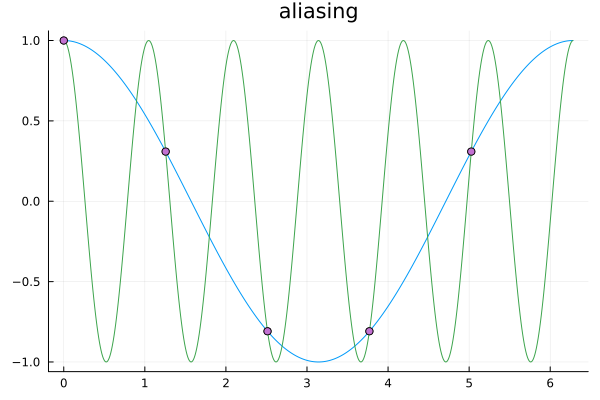

In [30]:
using Plots, LinearAlgebra, SparseArrays
n = 5
k = 1
x = range(0,2π;length=n+1)[1:end-1] # x₀, …, xₙ₋₁ 
xx = 0:0.01:2π  # plotting grid
plot(xx,cos.(k*xx); legend=false,title="aliasing")
scatter!(x,cos.(k*x))
plot!(xx,cos.((k+n)*xx))
scatter!(x,cos.((k+n)*x))

## The discrete Fourier transform (DFT)

We can express the approximate Fourier coefficients $\tilde{c}^n_k$ as the following matrix-vector product:
$$
\underbrace{\left(
\begin{array}{c}
\tilde{c}^n_0 \\
\tilde{c}^n_1 \\
\vdots \\
\tilde{c}^n_{n-2} \\
\tilde{c}^n_{n-1}
\end{array}
\right)}_{\tilde{\mathbf{c}}} = 
{1 \over n} \begin{bmatrix} 1 & 1 & 1&  ⋯ & 1 \\
                                    1 & {\rm e}^{-{\rm i} x_1} & {\rm e}^{-{\rm i} x_2} & ⋯ & {\rm e}^{-{\rm i} x_{n-1}} \\
                                    1 & {\rm e}^{-{\rm i} 2 x_1} & {\rm e}^{-{\rm i} 2 x_2} & ⋯ & {\rm e}^{-{\rm i} 2x_{n-1}} \\
                                    ⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
                                    1 & {\rm e}^{-{\rm i} (n-1) x_1} & {\rm e}^{-{\rm i} (n-1) x_2} & ⋯ & {\rm e}^{-{\rm i} (n-1) x_{n-1}}
\end{bmatrix} 
\underbrace{\left(
\begin{array}{c}
f(x_0) \\
f(x_1) \\
\vdots \\
f(x_{n-2}) \\
f(x_{n-1})
\end{array}
\right)}_{\mathbf{f}}.
$$
We express this as
$$
\tilde{\mathbf{c}} = \frac{1}{\sqrt{n}}Q_{n}\mathbf{f}
$$
where $Q_n$ is the *Discrete Fourier Transform* (DFT) matrix.

**Definition (DFT)**
The _Discrete Fourier Transform (DFT)_ matrix is defined as:
$$
\begin{align*}
Q_n &:= {1 \over \sqrt{n}} \begin{bmatrix} 1 & 1 & 1&  ⋯ & 1 \\
                                    1 & {\rm e}^{-{\rm i} x_1} & {\rm e}^{-{\rm i} x_2} & ⋯ & {\rm e}^{-{\rm i} x_{n-1}} \\
                                    1 & {\rm e}^{-{\rm i} 2 x_1} & {\rm e}^{-{\rm i} 2 x_2} & ⋯ & {\rm e}^{-{\rm i} 2x_{n-1}} \\
                                    ⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
                                    1 & {\rm e}^{-{\rm i} (n-1) x_1} & {\rm e}^{-{\rm i} (n-1) x_2} & ⋯ & {\rm e}^{-{\rm i} (n-1) x_{n-1}}
\end{bmatrix} 
\end{align*}
$$
Note that
$$
\begin{align*}
Q_n^⋆ &= {1 \over \sqrt{n}} \begin{bmatrix}
1 & 1 & 1&  ⋯ & 1 \\
1 & {\rm e}^{{\rm i} x_1} & {\rm e}^{{\rm i} 2 x_1} & ⋯ & {\rm e}^{{\rm i} (n-1) x_1} \\
1 &  {\rm e}^{{\rm i} x_2}  & {\rm e}^{{\rm i} 2 x_2} & ⋯ & {\rm e}^{{\rm i} (n-1)x_2} \\
⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
1 & {\rm e}^{{\rm i} x_{n-1}} & {\rm e}^{{\rm i} 2 x_{n-1}} & ⋯ & {\rm e}^{{\rm i} (n-1) x_{n-1}}
\end{bmatrix} 
\end{align*}
$$
**Proposition (DFT is Unitary)** $Q_n$ is unitary: $Q_n^⋆ Q_n = Q_n Q_n^⋆ = I$.

**Proof**
$$
Q_n Q_n^⋆  = \frac{1}{2\pi}\begin{bmatrix} I_n[1] & I_n[{\rm e}^{{\rm i} x}] & ⋯ & I_n[{\rm e}^{{\rm i} (n-1) x}] \\
                            I_n[{\rm e}^{-{\rm i} x}] & I_n[1] & ⋯ & I_n[{\rm e}^{{\rm i} (n-2) x}] \\
                            ⋮ & ⋮ & ⋱ & ⋮ \\
                            I_n[{\rm e}^{-{\rm i}(n-1) x}] & I_n[{\rm e}^{-{\rm i}(n-2) x}] & ⋯ & I_n[1]
                            \end{bmatrix} = I
$$
$\blacksquare$

## Trigonometric interpolants

In the previous chapter we learnt about the importance of polynomial interpolants in approximation methods (which includes methods for differential equations).  For periodic functions, trigonometric interpolants (interpolants consisting of trigonometric functions (e.g., sines and cosines) as opposed to polynomials) are equally important for approximation methods.

**Note:** For the rest of this chapter, we let $n$ be an odd positive integer and set $n = 2m + 1$.

**Proposition (trigonometric interpolant)** Suppose $n$ is odd with $n = 2m+1$, then 
$$
p_n(x) = \sum_{k=-m}^{m}\tilde{c}^n_{k}{\rm e}^{{\rm i}kx}
$$
interpolates $f$ at $x_j$, $j = 0, \ldots, n-1$, i.e., $p(x_j) = f(x_j)$ for $j = 0, \ldots, n-1$.

**Proof**  We want to show that $\mathbf{p} = \mathbf{f}$, where 
$$
\mathbf{p} = \left(
\begin{array}{c}
p_n(x_0) \\
p_n(x_1) \\
\vdots \\
p_n(x_{n-2}) \\
p_n(x_{n-1})
\end{array}
\right) \qquad \text{and} \qquad 
\mathbf{f} = \left(
\begin{array}{c}
f(x_0) \\
f(x_1) \\
\vdots \\
f(x_{n-2}) \\
f(x_{n-1})
\end{array}
\right)
$$
We have that
$$
\mathbf{p} = \left(
\begin{array}{c}
p_n(x_0) \\
p_n(x_1) \\
\vdots \\
p_n(x_{n-2}) \\
p_n(x_{n-1})
\end{array}
\right)
=
\underbrace{\begin{bmatrix}
1 & 1 & 1&  ⋯ & 1 \\
{\rm e}^{-{\rm i}m x_1} & {\rm e}^{-{\rm i}(m-1) x_1} &  {\rm e}^{-{\rm i}(m-2) x_1} & ⋯ & {\rm e}^{{\rm i} m x_1} \\
{\rm e}^{-{\rm i}m x_2} & {\rm e}^{-{\rm i}(m-1) x_2} &  {\rm e}^{-{\rm i}(m-2) x_2} & ⋯ & {\rm e}^{{\rm i} m x_2} \\
⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
{\rm e}^{-{\rm i}m x_{n-1}}& {\rm e}^{-{\rm i}(m-1)x_{n-1}}& {\rm e}^{-{\rm i}(m-2)x_{n-1}}& \cdots & {\rm e}^{{\rm i}m x_{n-1}}
\end{bmatrix}}_{V} 
\left(
\begin{array}{l}
\tilde{c}^n_{-m} \\
\tilde{c}^n_{-m+1} \\
\vdots \\
\tilde{c}^n_{m-1} \\
\tilde{c}^n_{m}
\end{array}
\right)
$$
where $V$ is known as the Vandermonde matrix.

Since $\tilde{c}^n_{-1} = \tilde{c}^n_{n-1}$, $\tilde{c}^n_{-2} = \tilde{c}^n_{n-2}$, $\ldots$, $\tilde{c}^n_{-m} = \tilde{c}^n_{n-m} = \tilde{c}^n_{m+1}$
$$
\left(
\begin{array}{l}
\tilde{c}^n_{-m} \\
\vdots \\
\tilde{c}^n_{m}
\end{array}
\right) = 
\underbrace{\left(
\begin{array}{c c}
   & I_{m} \\
I_{m+1} & 
\end{array}
\right)}_{P}
\left(
\begin{array}{l}
\tilde{c}^n_{0} \\
\vdots \\
\tilde{c}^n_{n-1}
\end{array}
\right) = P\: \tilde{\mathbf{c}} = \frac{P}{\sqrt{n}}Q_{n}\mathbf{f}
$$
where $I_m$ denotes an $m\times m$ identity matrix and hence $P$ is a permutation matrix.

Let $\mathbf{x} = \left(\begin{array}{c c c} x_0 & \cdots & x_{n-1}  \end{array}\right)^{\top}$, then we can express the Vandermonde matrix as
$$
V = 
\left(
\begin{array}{c c c c c c c}
{\rm e}^{-{\rm i}m\mathbf{x}}  & \cdots & {\rm e}^{-{\rm i}\mathbf{x}} &\mathbf{1}  & {\rm e}^{{\rm i}\mathbf{x}} & \cdots & {\rm e}^{{\rm i}m\mathbf{x}}
\end{array}
\right)
$$
and
$$
\sqrt{n}\,Q_n^* = \left(
\begin{array}{c c c c c}
\mathbf{1}  & {\rm e}^{{\rm i}\mathbf{x}} & {\rm e}^{2{\rm i}\mathbf{x}} & \ldots & {\rm e}^{(n-1){\rm i}\mathbf{x}}
\end{array}
\right)
$$
Since ${\rm e}^{-{\rm i}\mathbf{x}} = {\rm e}^{{\rm i}(n-1)\mathbf{x}}$, ${\rm e}^{-2{\rm i}\mathbf{x}} = {\rm e}^{{\rm i}(n-2)\mathbf{x}}$, $\dots$, ${\rm e}^{-m{\rm i}\mathbf{x}} = {\rm e}^{{\rm i}(n-m)\mathbf{x}} = {\rm e}^{{\rm i}(m+1)\mathbf{x}}$, we have that
$$
V = \sqrt{n}\,Q_n^*\left(
\begin{array}{c c}
 & I_{m+1} \\
I_m &
\end{array}
\right) =  \sqrt{n}\,Q_n^* P^{\top}
$$

Putting everything together, we have
$$
\mathbf{p} = \sqrt{n}Q_n^* P^{T} P \frac{Q_n}{\sqrt{n}}\mathbf{f} = \mathbf{f}
$$
$\blacksquare$

Let's check the formula $V = \sqrt{n}\,Q_n^* P^{\top}$ in code

In [31]:
n = 11
m = (n-1)÷2
x = range(0,2π; length=n+1)[1:end-1] # x_0, …,x_{n-1}, dropping x_n == 2π
Qₙ = [exp(-im*(k-1)*x[j]) for k = 1:n, j=1:n]/sqrt(n)
Qₙ*Qₙ' ≈ I

true

In [32]:
P = sparse(1:n, [m+2:n;1:m+1], fill(1,n))

11×11 SparseMatrixCSC{Int64, Int64} with 11 stored entries:
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅

In [33]:
V = [exp(im*k*x[j]) for j = 1:n, k=-m:m]
V ≈ sqrt(n)*Qₙ'*transpose(P)

true

Here's an example illustrating that $p(x)$ interpolates $f$ at $x_{j}$ for $j = 0, \ldots, n-1$.

In [34]:
# write a function that evaluates the trigonometric interpolant
function triginterp(c, x)
    # c = [c₀, …, cₙ₋₁] (the approximate Fourier coefficients)
    m = (n-1)÷2 # use coefficients between -m:m
    p = 0.0 + 0.0im # coefficients are complex so we need complex arithmetic
    for k = 0:m
        p += c[k+1] * exp(im*k*x)
    end
    for k = -m:-1
        p += c[end+k+1] * exp(im*k*x)
    end
    p
end;

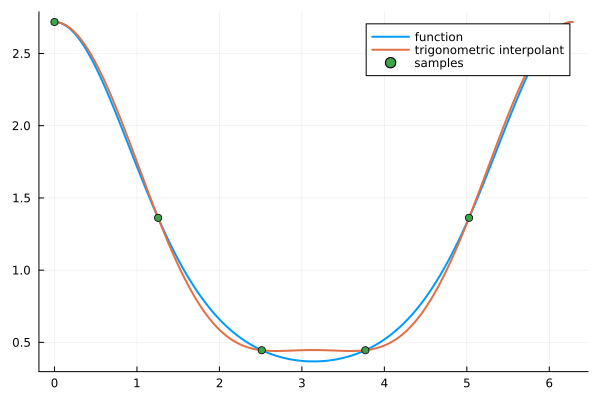

In [35]:
f = x -> exp(cos(x))
n = 5
# compute the approximate Fourier coefficients
x = range(0,2π; length=n+1)[1:end-1] # interpolation nodes x_0, …,x_{n-1}
Qₙ = 1/sqrt(n) * [exp(-im*(k-1)*x[j]) for k = 1:n, j=1:n]
c = 1/sqrt(n) * Qₙ * f.(x)

p = x -> triginterp(c, x)

xx = range(0, 2π; length=1000) # plotting grid
plot(xx, f.(xx); lw=2, label="function",legend=:topright)
plot!(xx, real.(p.(xx)); lw=2, label="trigonometric interpolant")
scatter!(x, f.(x); label="samples")

## The Fast Fourier Transform (FFT)

We have proved that
$$
\tilde{\mathbf{c}} =  \frac{1}{\sqrt{n}}Q_{n}\mathbf{f} =  \frac{1}{\sqrt{n}}Q_{n}\mathbf{p} \qquad \text{and} \qquad \mathbf{p} = \mathbf{f} = \sqrt{n}\,Q_{n}^*\tilde{\mathbf{c}}.
$$
That is, the DFT matrix $Q_n$ maps the values of the interpolant $p_n(x)$ on the equispaced grid (the vector $\mathbf{p}$) to its coefficients $\tilde{\mathbf{c}}$ and the inverse of the DFT matrix, $Q_{n}^*$, performs the inverse map, from the coefficients of $p_n$ to the values of $p_n$ on the equispaced grid.

Applying $Qₙ$ or its conjugate transpose $Q_n^⋆$ to a vector naively takes $\mathcal{O}(n^2)$ operations.
Both can be reduced to $\mathcal{O}(n \log n)$ operations using the celebrated _Fast Fourier Transform_ (FFT),
which is one of the [Top 10 Algorithms of the 20th Century](https://pi.math.cornell.edu/~web6140/).  In Julia and Matlab, we use `fft` to map function values to approximate Fourier coefficients and `ifft` does the inverse map, from approximate Fourier coefficients to function values on the equispaced grid.

In [36]:
# Here's an example of using the FFT to map function values to coefficients and vice versa
using FFTW
f = x -> exp(cos(x-0.1))
n = 31
m = (n-1)÷2
# evenly spaced points from 0:2π, dropping last node
x = range(0, 2π; length=n+1)[1:end-1]
# fft returns the approximate Fourier coefficients n*[c₀, …, c_ₙ₋₁]
c = fft(f.(x))/n
# check that ifft maps c to [f(x₀), …, f(xₙ₋₁)]/n
f.(x) ≈ n*ifft(c)

true

**Remark** The FFTW.jl package wraps the FFTW (Fastest Fourier Transform in the West) library,
which is a highly optimised implementation
of the FFT.
(As an aside, the creator of FFTW [Steven Johnson](https://math.mit.edu/~stevenj/) is now a
Julia contributor and user.)

When we use the FFT to map function values on the grid $\mathbf{f}$ to approximate Fourier coefficients, $\tilde{\mathbf{c}}$, we shall express this as
$$
\tilde{\mathbf{c}} = \mathcal{F}\lbrace \mathbf{f}  \rbrace
$$
and we denote the map from coefficients to function values via the (inverse) FFT by
$$
\mathbf{f}  = \mathcal{F}^{-1}\lbrace \tilde{\mathbf{c}} \rbrace
$$
These equations are mathematically equivalent to 
$$
\tilde{\mathbf{c}} =  \frac{1}{\sqrt{n}}Q_{n}\mathbf{f} =  \frac{1}{\sqrt{n}}Q_{n}\mathbf{p} \qquad \text{and} \qquad \mathbf{p} = \mathbf{f} = \sqrt{n}\,Q_{n}^*\tilde{\mathbf{c}},
$$
the symbols $\mathcal{F}$ and $\mathcal{F}^{-1}$ merely indicate that the maps from function values to coefficients (or vice versa) are computed using a fast algorithm.

The magic of the FFT is because its complexity is $\mathcal{O}(n \log n)$ (almost linear in $n$) we can scale it to very high orders.
Here we plot the Fourier coefficients for a function that requires around 1 million
coefficients to resolve:

  0.303010 seconds (169.54 k allocations: 61.867 MiB, 7.29% gc time, 14.24% compilation time)


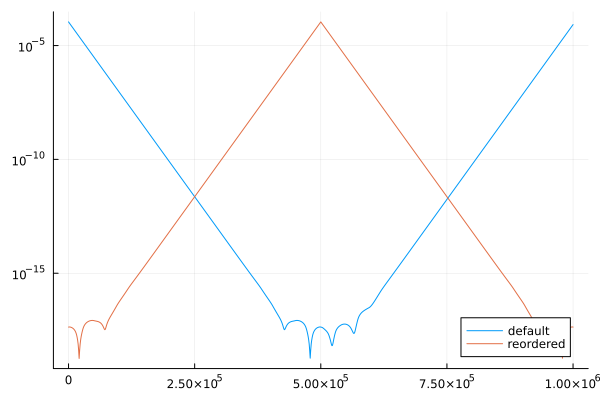

In [37]:
f = x -> exp(sin(x))/(1+2e8cos(x)^2)
n = 1000_001
m = (n-1)÷2
# evenly spaced points from 0:2π, dropping last node
x = range(0, 2π; length=n+1)[1:end-1]

# fft returns discrete Fourier coefficients n*[c₀, …, c_ₙ₋₁]
c = @time fft(f.(x))/n

inc = 1000
plot(1:inc:1000_001,abs.(c[1:inc:end]); yscale=:log10, legend=:bottomright, label="default")

# Reorder using [c₋ₘ, …, c₋₁] == [cₙ₋ₘ, …, cₙ₋₁]
c = [c[m+2:end]; c[1:m+1]]
plot!(1:inc:1000_001,abs.(c[1:inc:end]); yscale=:log10, label="reordered")

The FFT allows us to efficiently transform between "space" / "(function) value space" / "physical space" and "dual space" / "coefficient space" / "frequency space".  This is essential in the context of numerical methods for differential equations because we'll see that some operations (e.g. differentiation) can be performed much more efficiently in coefficient space than in value space, while computing nonlinear terms may be performed more efficiently in value space.   

## Trigonometric interpolation in value space and coefficient space

We have shown above that for $n = 2m+1$,
$$
p_n(x) = \sum_{k=-m}^{m} \tilde{c}^n_k{\rm e}^{{\rm i}kx},  \qquad \qquad (1)
$$
with
$$
\tilde{c}^n_k = \frac{1}{n}\sum_{j=0}^{n-1}f(x_j){\rm e}^{{\rm i}kx_j}  \qquad  \qquad (2)
$$
interpolates $f$ at $x_0$, $\ldots$, $x_{n-1}$. This is a representation of the interpolant $p_n$ in terms of coefficients $\tilde{c}^n_k$ and basis functions ${\rm e}^{{\rm i}kx}$.   Now we want to construct a different representation of $p_n$ in terms of function values $f(x_j)$ to illustrate the difference between interpolation and differentiation in value space and coefficient space. 

Similar to the formula for the Lagrange interpolating polynomial, we want a formula for a trigonometric interpolant of the form
$$
p_n(x) = \sum_{j=0}^{n-1}\ell_{j}(x) f(x_{j}),
$$
Notice that now $p_n$ is represented as an expansion in function values $f(x_{j})$ and basis functions $\ell_{j}(x)$.  Here we refer to the basis functions $\ell_{j}(x)$ as trigonometric basis functions.

In the previous chapter, we showed that if the basis functions $\ell_{j}(x)$ have the *delta interpolation* property, then $p_n(x)$ will interpolate $f(x)$ at the interpolation nodes (here the nodes are $x_j = jh$, $j = 0, \ldots, n-1$ with $h = 2\pi/n$).  Here, however, we also want $p_n(x)$ to be $2\pi$-periodic ($p_n(x_j+2\pi) = p_n(x_{j+n}) = p_n(x_j)$).  Therefore, we  require the basis functions to have the following **periodic** *delta interpolation* property:
$$
\ell_{j}(x_i) = \begin{cases}
1 & \text{if } i = j, i = j \pm n, i = j \pm 2n, \ldots \quad (\text{i.e.}, i = j\: ({\rm mod}\: n))  \\
0 & \text{otherwise } 
\end{cases}.
$$
If the basis functions have the periodic delta interpolation property, then the interpolant will have the required properties, namely
$$
p_n(x_{j}) = f(x_{j}), \qquad j = 0, \ldots, n - 1,
$$
and $p(x_{j + pn}) = p(x_{j})$, for $p \in \mathbb{Z}$.

How can we construct basis functions $\ell_{j}(x)$ that satisfy the periodic delta interpolation property?

First, let's try to construct $\ell_0(x)$.  

We can construct $\ell_0(x)$ by using (1) and (2) above for a function $f(x)$ with the property 
$$
f(x_j) = \delta_{j0} = \begin{cases}
1 & \text{if } j = 0 \\
0 & \text{if } j = 1, 2, \ldots, n - 1
\end{cases},
$$
but why?

**Proposition (construction of $\ell_0(x)$)** If $f(x_j) = \delta_{j0}$, then 
$$
p_n(x) = \frac{1}{n}\frac{\sin((m+1/2)x)}{\sin(x/2)}
$$
and $p_n(x)$ satisfies the periodic delta interpolation property with $j = 0$.

**Proof** It follows from (1) and (2) that
$$
\tilde{c}^n_{k} = \frac{1}{n} = \frac{h}{2\pi}, \qquad  k = -m, \ldots, m,
$$
therefore
$$
p_n(x) = \sum_{k=-m}^{m} \tilde{c}^n_k{\rm e}^{{\rm i}kx} = \frac{h}{2\pi}\sum_{k=-m}^{m} {\rm e}^{{\rm i}kx} = \frac{1}{n}\frac{\sin((m+1/2)x)}{\sin(x/2)}.
$$
We have already proved that $p_n(x_j) = f(x_j)$, $j = 0, \ldots, n-1$ (hence $p_n(x_j) = \delta_{j0}$) and since $p_n(x)$ is $2\pi$-periodic by construction, it follows that $p_n(x_j + 2\pi p) = p_n(x_j) = \delta_{j0}$, $p \in \mathbb{Z}$ and therefore it satisfies the periodic delta interpolation property with $j = 0$.    $\blacksquare$

**Remark** This result shows that we can set 
$$
\ell_0(x) = \frac{1}{n}\frac{\sin((m+1/2)x)}{\sin(x/2)}.
$$

**Corollary (all the basis functions are translates of $\ell_0(x)$)** We have that
$$
\ell_0(x - x_j)
$$
satisfies the periodic delta interpolation property for $j \in \mathbb{Z}$.

**Proof** Since
$$
\ell_{0}(x_i) = \begin{cases}
1 & \text{if } i = 0, i =  \pm n, i = \pm 2n, \ldots \quad (\text{i.e.}, i = 0\: ({\rm mod}\: n))  \\
0 & \text{otherwise } 
\end{cases},
$$
it follows that
$$
\ell_{0}(x_i - x_j) = \ell_{0}(x_{i-j})  =  \begin{cases}
1 & \text{if } i = j, i = j \pm n, i = j\pm 2n, \ldots \quad (\text{i.e.}, i = j\: ({\rm mod}\: n))  \\
0 & \text{otherwise } 
\end{cases},
$$
i.e., $\ell_{0}(x - x_j)$ satisfies the periodic delta interpolation property for any $j \in \mathbb{Z}$.  $\blacksquare$

**Remark:** This result implies that we can set
$$
\ell_j(x) = \ell_0(x - x_j).
$$

Let's check that $\ell_0(x)$ has the required properties:

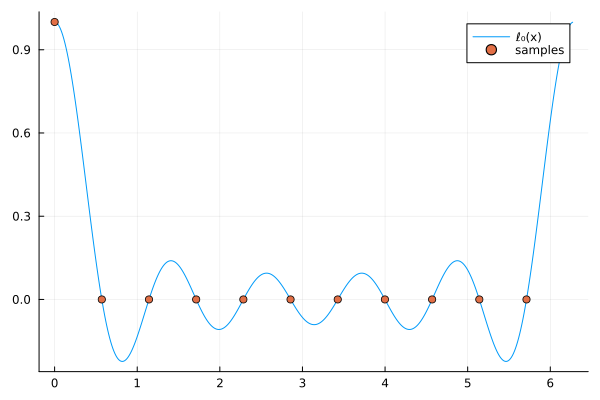

In [38]:
n = 11
m = (n-1)÷2
h = 2π/n
ℓ₀ = x -> x == 0 ? 1 : h/(2π)*sin((m+0.5)*x)/sin(x/2)
x = range(0,2π;length=n+1)[1:end-1] #x₀, …, x_{n-1}
xx = range(0,2π;length=501)[1:end-1] #plotting grid
plot(xx,ℓ₀.(xx);label="ℓ₀(x)")
scatter!(x,ℓ₀.(x);label="samples")

Here is a translated version of $\ell_0(x)$, namely $\ell_0(x-x_{m}) = \ell_{m}(x)$

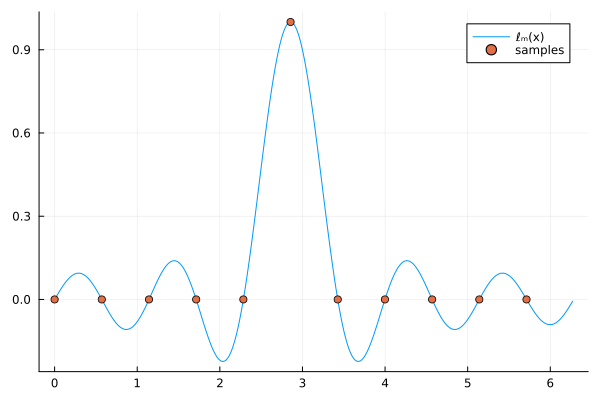

In [39]:
plot(xx,ℓ₀.(xx .- x[m+1]);label="ℓₘ(x)")
scatter!(x,ℓ₀.(x .- x[m+1]);label="samples")

To summarise the results we proved above: the value space representation of the trigonometric interpolant is
$$
p_n(x) = \sum_{j=0}^{n-1}\ell_j(x)f(x_j) = \sum_{j=0}^{n-1}\ell_0(x-x_j)f(x_j), \qquad \ell_0(x) = \frac{1}{n}\frac{\sin((m+1/2)x)}{\sin(x/2)},
$$
and, by construction, $p_n(x_j) = f(x_j)$, $j = 0, \ldots, n-1$.

## Differentiation in value space and coefficient space

### Differentiation in value space

As in the previous chapter, we approximate the derivative of a function by differentiating its interpolant (here, a trigonometric interpolant). That is,
$$
f'(x_i) \approx p_n'(x_i) = \sum_{j=0}^{n-1}\ell_{j}'(x_i) f(x_{j})  = \sum_{j=0}^{n-1}\ell_{0}'(x_i-x_j)f(x_{j}), \qquad i = 0, \ldots, n-1.
$$
We can express these equations as a matrix-vector product as we did in the previous chapter: $\mathbf{f}' \approx \mathbf{p}' = D_n \mathbf{f}$, where the $(i,j)$-th entry of the $n \times n$ differentiation matrix $D_n$ is
$$
\left(D_n \right)_{i,j} = \ell_{0}'(x_i-x_j) = \begin{cases}
 0 & \text{if } i = j \\
 \frac{(-1)^{i-j}}{2}\csc\left( \frac{(i-j)h}{2} \right)  & \text{if } i\neq j
\end{cases}.
$$
This implies that the entries on the diagonals of $D_n$ are the same (because $j - i$ or $i-j$ are constant along the diagonals of a matrix), i.e., $D_n$ is a Toeplitz matrix  and the entries  on the $(j-i)$-th diagonal is $\frac{(-1)^{i-j}}{2}\csc\left( \frac{(i-j)h}{2} \right)$ if $j - i \neq 0$:

$$
\underbrace{\left(
\begin{array}{c}
f'(x_0) \\
  \\
\vdots  \\
  \\
f'(x_{n-1})
\end{array}
\right)}_{\mathbf{f}'} \approx 
\underbrace{\left(
\begin{array}{c}
p'(x_0) \\
  \\
\vdots  \\
  \\
p'(x_{n-1})
\end{array}
\right)}_{\mathbf{p}'} = 
\underbrace{\left(
\begin{array}{c c c c c c c}
  &       &       & \vdots  &   &   & \\
  &\ddots &       & \frac{1}{2}\csc \frac{3h}{2}   &   &    &  \\
   &\ddots &      &-\frac{1}{2}\csc \frac{2h}{2}   &   &    &  \\ 
   &\ddots &      & \frac{1}{2}\csc \frac{1h}{2}   &   &    &   \\
  &        &      & 0                              &   &    &   \\
&      &      & -\frac{1}{2}\csc \frac{1h}{2}   &   &   \ddots &  \\
&      &      & \frac{1}{2}\csc \frac{2h}{2}   &   &   \ddots &  \\
&      &      & -\frac{1}{2}\csc \frac{3h}{2}   &   &   \ddots &  \\
&      &      & \vdots  &   &    &  \\
\end{array}
\right)}_{D_n}
\underbrace{\left(
\begin{array}{c}
f(x_0) \\
  \\
\vdots  \\
  \\
f(x_{n-1})
\end{array}
\right)}_{\mathbf{f}}.
$$

Recall that we saw this differentiation matrix in the previous chapter.

### Differentiation in coefficient space

Alternatively, we can approximate $f'$ by differentiating the "coefficient space" interpolant (1):
$$
f'(x) \approx p_n'(x) = \sum_{k=-m}^{m} {\rm i }k\tilde{c}^n_k{\rm e}^{{\rm i}kx}.
$$
Similarly, we approximate the $\nu$-th order derivative with $\nu \in \mathbb{Z}_+$ as
$$
f^{(\nu)}(x) \approx p^{(\nu)}_n(x) = \sum_{k=-m}^{m} \left({\rm i }k\right)^{\nu}\,\tilde{c}^n_k{\rm e}^{{\rm i}kx}.
$$
Let's denote the Fourier coefficients of $f^{(\nu)}(x)$ by $c_k^{(\nu)}$, then
$$
f^{(\nu)}(x) = \sum_{k=-\infty}^{\infty}c_k^{(\nu)}{\rm e}^{{\rm i}kx},
$$
where $c_k^{(\nu)} =  \left( {\rm i}k \right)^{\nu} c_k$.  

Expressed in linear algebra notation, the Fourier coefficients of $f^{(\nu)}(x)$ are
$$
\left(\begin{array}{c}
\vdots \\
c_{-2}^{(\nu)}\\
c_{-1}^{(\nu)}\\
c_0^{(\nu)}\\
c_1^{(\nu)}\\
c_2^{(\nu)}\\
\vdots
\end{array}
\right)
= 
\left(
\begin{array}{c c c c c c c}
\ddots & & &  & & & \\
 & (-2{\rm i})^{\nu} & & & & & \\
  &  & (-{\rm i})^{\nu} & & & &  \\
  &  &  & 0 & & &  \\
    &  & & & {\rm i}^{\nu} & &  \\
 & & &     &  & (2{\rm i})^{\nu} &   \\
  & & &     &  & &  \ddots \\
\end{array}
\right)
\left(\begin{array}{c}
\vdots \\
c_{-2}\\
c_{-1}\\
c_0\\
c_1\\
c_2\\
\vdots
\end{array}
\right).
$$
We approximate a finite number of these Fourier coefficients as follows, 
$$
\left(
\begin{array}{c}
c_{-m}^{(\nu)} \\
\vdots \\
c_{0}^{(\nu)} \\
\vdots \\
c_{m}^{(\nu)}
\end{array}
\right) \approx
\left(
\begin{array}{c c c c c}
\left(-{\rm i}m\right)^{\nu} &  &  &  &   \\
   & \ddots &   & &   \\
      &  &  0 & &   \\
         &  &   & \ddots &   \\
   &   & &     & \left({\rm i}m\right)^{\nu}
\end{array}
\right)
\left(
\begin{array}{c}
\tilde{c}^n_{-m} \\
\vdots \\
\tilde{c}^n_{0} \\
\vdots \\
\tilde{c}^n_{m}
\end{array}
\right).
$$
Note that in coefficient space, *the differentiation matrix is diagonal* whereas in value space it is dense.

### Differentiation in coefficient space via FFTs

Recall that the FFT is a fast algorithm for mapping the values of the interpolant to its coefficients and vice versa:
$$
\tilde{\mathbf{c}} = \mathcal{F}\lbrace \mathbf{f}  \rbrace = \mathcal{F}\lbrace \mathbf{p}  \rbrace, \qquad  \mathbf{p} =  \mathbf{f} = \mathcal{F}^{-1}\lbrace\tilde{\mathbf{c}}\rbrace 
$$
Since the coefficients of $p^{(\nu)}_n(x)$ are $({\rm i} k)^{\nu}\tilde{c}^n_k$ for $k = -m, \ldots, m$, we just need to apply the (inverse) FFT to $({\rm i} k)^{\nu}\tilde{c}^n_k$ for $k = -m, \ldots, m$ to obtain $p^{(\nu)}_n(x_j)$ for $j = 0, \ldots, n-1$ and then we approximate $f^{(\nu)}(x_j) \approx p^{(\nu)}_n(x_j)$.

We express this procedure mathematically in vector notation as follows:
$$
\mathbf{f}^{(\nu)} \approx \mathbf{p}^{(\nu)} = 
\mathcal{F}^{-1}\left\lbrace\left({\rm i}(-m\!:\!m)\right)^{\nu}\cdot\mathcal{F}\lbrace \mathbf{f} \rbrace\right\rbrace
$$
Note that this procedure has $\mathcal{O}(n \log n)$ complexity whereas naive multiplication by a dense differentiation matrix (as we did in the previous chapter) has quadratic complexity ($\mathcal{O}(n^2)$).

When implementing differentiation via the FFT in code, we should recall the ordering of the coefficients in the vector $\tilde{\mathbf{c}} = \mathcal{F}\lbrace \mathbf{f}  \rbrace$:
$$
\left(
\begin{array}{l}
\tilde{c}^n_{-m} \\
\vdots \\
\tilde{c}^n_{m}
\end{array}
\right) = 
\underbrace{\left(
\begin{array}{c c}
   & I_{m} \\
I_{m+1} & 
\end{array}
\right)}_{P}
\underbrace{\left(
\begin{array}{l}
\tilde{c}^n_{0} \\
\vdots \\
\tilde{c}^n_{n-1}
\end{array}
\right)}_{\tilde{\mathbf{c}}} = P\: \tilde{\mathbf{c}} = P\mathcal{F}\lbrace \mathbf{f}  \rbrace = P\mathcal{F}\lbrace \mathbf{p}\rbrace
$$

Therefore, $\left({\rm i}(-m\!:\!m)\right)^{\nu}\cdot\mathcal{F}\lbrace  \mathbf{f} \rbrace$ should, strictly speaking, be expressed as $\left({\rm i}(-m\!:\!m)\right)^{\nu}\cdot P\mathcal{F}\lbrace  \mathbf{f} \rbrace$.  In Julia and Matlab, the permutation $P$ is performed by the command `fftshift` and the permutation (or re-ordering) can be undone via `ifftshift` (this performs the inverse permutation, $P^{\top}$).

Here is an example:

In [40]:
f = x -> 1/(2 + cos(x))
Df = x -> sin(x)/(2 + cos(x))^2  # derivative
n = 101
m = (n-1)÷2
x = range(0,2π;length=n+1)[1:end-1] # grid points x₀, …, xₙ₋₁
# map function values to coefficients via the fft
c = fft(f.(x))/n; # [c₀, …, cₙ₋₁]
# re-order coefficients
ch = fftshift(c);  # reorder the coefficients to [c₋ₘ, …, cₘ]
# Fourier coefficients of the derivative
dch = (im*(-m:m)).*ch;
# re-order
dc = ifftshift(dch); # undoes what fftshift did
# map coefficients to function values via the ifft
df = n*ifft(dc);
norm(df - Df.(x),Inf)

1.7790211156964822e-14

In [41]:
# more briefly
df = ifft(ifftshift(im*(-m:m)).*fft(f.(x)))
norm(df - Df.(x),Inf)

1.7726178619566572e-14

Here we approximate $f'(x_j)$, $j = 0, \ldots, n-1$ using (i) differentiation matrices and (ii) the FFT.  These are mathematically equivalent procedures, however the computational complexities of (i) and (ii) differ, as discussed above.

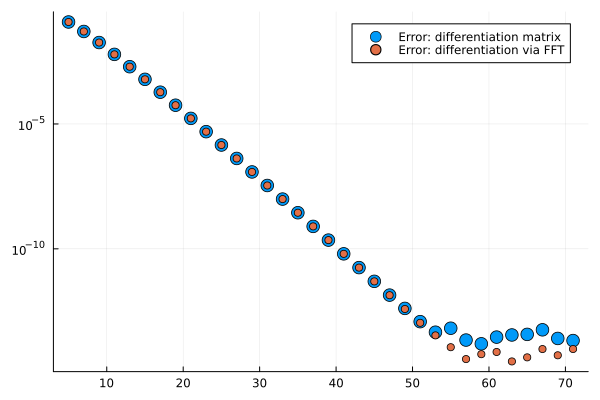

In [42]:
using ToeplitzMatrices
nv = 5:2:71
f = x -> 1/(2 + cos(x))
Df = x -> sin(x)/(2 + cos(x))^2  # derivative

# Differentiation matrices
errs = 
[( h = 2π/n;
    column = [0; 0.5*(-1).^(1:n-1).*csc.((1:n-1)*h/2)];
    Dₙ = Toeplitz(column,[column[1]; column[n:-1:2]]); # Differentiation matrix:
    x = range(0,2π;length=n+1)[1:end-1]; # n equally spaced points on [0, 2π)
    norm(Dₙ*f.(x) - Df.(x),Inf) ) for n = nv] # maximum error at the set of N points

# Differentiation in coefficient space via the FFT
errsfft = 
[(  m = (n-1)÷2;
    x = range(0,2π;length=n+1)[1:end-1];
    df = ifft(ifftshift(im*(-m:m)).*fft(f.(x)));
    norm(df - Df.(x),Inf) ) for n = nv]

# plot the error on a semi-log (log-linear) scale
scatter(nv,errs;yscale=:log10,ms=7,label="Error: differentiation matrix")
scatter!(nv,errsfft;yscale=:log10,label="Error: differentiation via FFT")

## PDE examples

Now we have the tools to implement a numerical method for the *advection equation*
$$
u_t + u_x = 0, \qquad u = u(x,t).
$$
We want to approximate the solution to this equation with the initial data
$$
u(x,0) = f(x) = {\rm e}^{-100(x-1)^2}.
$$
One can easily verify that the exact solution to this Cauchy problem is
$$
u(x,t) = f(x - t).
$$
This solution can be derived using the method of characteristics.     

As it stands, this problem is posed on the entire real real line.  However, since the initial data decay very rapdily to zero away from $x=1$, it is approximately periodic on $[0, 2\pi]$ and therefore we approximate $u(x,t)$ in the $x$-direction using Fourier methods. 

Let the equispaced spatial grid be
$$
x_j = jh = j \frac{2\pi}{n_x}, \qquad j = 0, \ldots, n_x-1, \qquad n_x = 2m+1
$$
and we let $t \in [0, T]$ and set
$$
t_i = i\tau, \qquad \tau = \frac{T}{n_t}, \qquad i = 0, \ldots, n_t.
$$
Let $u^{i}_j$ denote the approximation to the exact solution $u$ at $x=x_j$ and $t = t_i$, i.e.,
$$
u^{i}_j \approx u(x_j, t_i).
$$
(the index $i$ should not be confused with the imaginary unit ${\rm i} = \sqrt{-1}$).  We set $u^{0}_j = u(x_j,0) = f(x_j)$ or, in vector notation, $\mathbf{u}^{0} = \mathbf{f}$.

We approximate the time-derivative with a forward difference:
$$
u_t(x_j,t_i) \approx \frac{u(x_j,t_{i+1}) - u(x_j,t_{i})}{\tau} \approx \frac{u^{i+1}_j - u^{i}_j}{\tau}, \qquad j = 0, \ldots, n_x-1
$$
or, in vector notation,
$$
u_t(\mathbf{x},t_i) \approx \frac{\mathbf{u}^{i+1} - \mathbf{u}^{i}}{\tau}.
$$
The spatial derivative is approximated using the FFT:
$$
u_x(\mathbf{x},t_i) \approx \mathcal{F}^{-1}\left\lbrace {\rm i}(-m\!:\!m)\cdot\mathcal{F}\lbrace \mathbf{u}^{i} \rbrace\right\rbrace
$$
Therefore we approximate the solution to the PDE as follows:
$$
\mathbf{u}^{i+1} = \mathbf{u}^{i} - \tau \mathcal{F}^{-1}\left\lbrace {\rm i}(-m\!:\!m)\cdot\mathcal{F}\lbrace \mathbf{u}^{i} \rbrace\right\rbrace, \qquad i = 0, \ldots, n_t-1, \qquad \mathbf{u}^0 = \mathbf{f}.
$$

In [43]:
f = x -> exp(-100*(x-1)^2)
nₓ = 401
m = (nₓ - 1)÷2
x = range(0,2π;length=nₓ+1)[1:end-1] # the equispaced grid in the x-direction
nₜ = 500
T = 1
τ = T/nₜ
u = zeros(nₜ + 1,nₓ)
u[1,:] = f.(x)  # initial data
for n = 1:nₜ-1
    u[n+1,:] = real.(u[n,:] - τ*ifft(ifftshift(im*(-m:m)).*fft(u[n,:])))
end

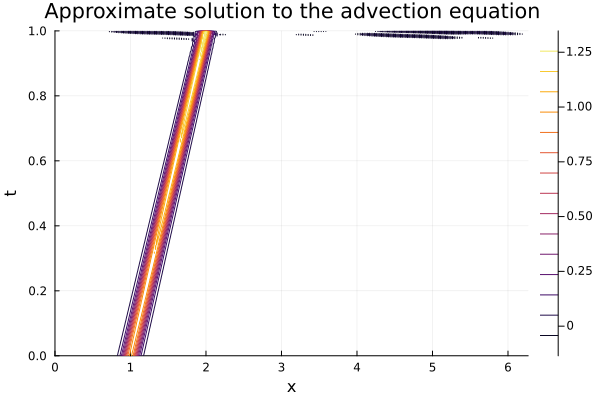

In [44]:
t = range(0,T;length=nₜ+1)
contour(x,t,u;xlabel="x",ylabel="t",title="Approximate solution to the advection equation")

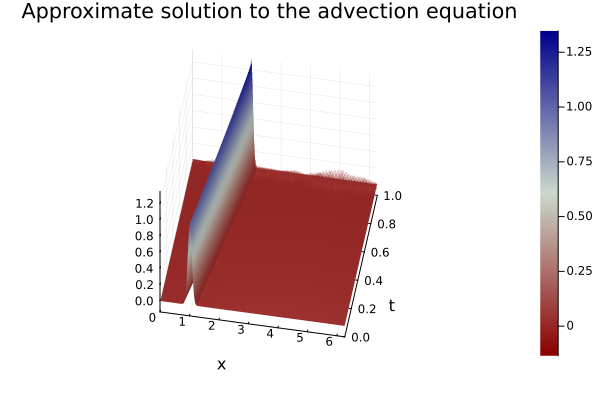

In [45]:
surface(x,t,u;seriescolor=:redsblues, camera=(10,50),
xlabel="x",ylabel="t",title="Approximate solution to the advection equation")

Note the spurious oscillations in the numerical solution (these grow exponentially fast with time).  We shall analyse why this instability occurs later in this module.  Whe shall also see that if we approximate the time derivative with a central difference, then we can take larger time steps while retaining stability. That is, if we use
$$
u_t(x_j,t_i) \approx \frac{u(x_j,t_{i+1}) - u(x_j,t_{i-1})}{2\tau} \approx \frac{u^{i+1}_j - u^{i-1}_j}{2\tau}, \qquad j = 0, \ldots, n_x-1
$$
and again approximate the spatial derivative via FFTs, then we obtain another numerical method for the advection equation:
$$
\mathbf{u}^{i+1} = \mathbf{u}^{i-1} - 2\tau \mathcal{F}^{-1}\left\lbrace {\rm i}(-m\!:\!m)\cdot\mathcal{F}\lbrace \mathbf{u}^{i} \rbrace\right\rbrace, \qquad i = 0, \ldots, n_t-1, \qquad \mathbf{u}^0 = \mathbf{f}.
$$
This is known as a leap frog method.

We have $\mathbf{u}^0$, however we also need $\mathbf{u}^1$ to implement the leap frog method.  There are various one-step methods one could use to obtain $\mathbf{u}^1$ from $\mathbf{u}^0$ (e.g., Runge-Kutta methods, which we might get to later) but here we use 10 steps of the forward difference method above with step size $\tau/10$:

In [46]:
nₜ = 500
T = 2.5
τ = T/nₜ
u = zeros(nₜ + 1,nₓ)

# First take ten steps using the forward difference formula
ut = zeros(11,nₓ)
u[1,:] = ut[1,:] =  f.(x) # initial data
for n = 1:10
    ut[n+1,:] = real.(ut[n,:] - τ/10*ifft(ifftshift(im*(-m:m)).*fft(ut[n,:])))
end

# Now use the leap frog method
u[2,:] = ut[11,:]
for n = 2:nₜ-1
    u[n+1,:] = real.(u[n-1,:] - 2τ*ifft(ifftshift(im*(-m:m)).*fft(u[n,:])))
end

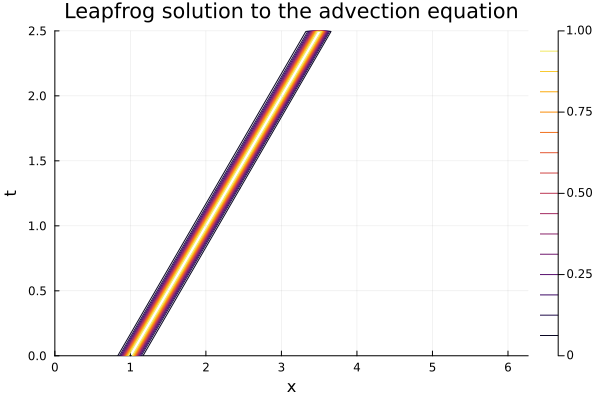

In [47]:
t = range(0,T;length=nₜ+1)
contour(x,t,u;xlabel="x",ylabel="t",title="Leapfrog solution to the advection equation")

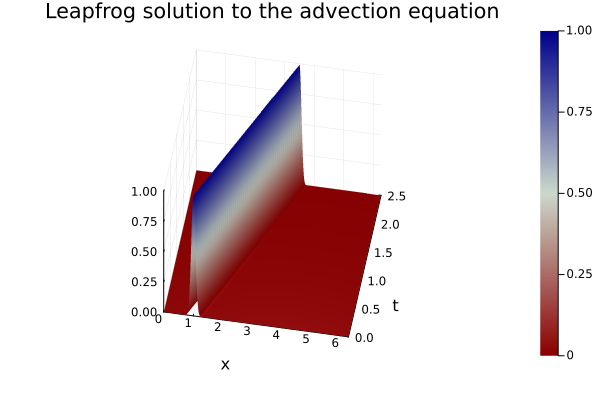

In [48]:
surface(x,t,u;seriescolor=:redsblues, camera=(10,50),
xlabel="x",ylabel="t",title="Leapfrog solution to the advection equation")

Let's consider now the advection equation with a variable coefficient:
$$
u_t + c(x)u_x = 0
$$
with 
$$
c(x) = \frac{1}{5} + \sin^2(x-1)
$$
and the same initial data as before, $u(x,0) = f(x) = {\rm e}^{-100(x-1)^2}$.  We can easily verify that the exact solution to this Cauchy problem (which can be derived using the method of characteristics) is 
$$
u(x,t) = f\left(t - C(x)  \right),
$$
where $C(x)$ is an antiderivative of $1/c(x)$, i.e., $C'(x) = 1/c(x)$.    For example,
$$
C(x) = -\frac{5}{\sqrt{6}}\arctan \left(\sqrt{6}\tan(1-x)  \right).
$$

If we again use central differences to approximate the time derivative and FFTs to approximate the spatial derivative, then the leapfrog method is
$$
\mathbf{u}^{i+1} = \mathbf{u}^{i-1} - 2\tau c(\mathbf{x})\cdot \mathcal{F}^{-1}\left\lbrace {\rm i}(-m\!:\!m)\cdot\mathcal{F}\lbrace \mathbf{u}^{i} \rbrace\right\rbrace, \qquad i = 0, \ldots, n_t-1, \qquad \mathbf{u}^0 = \mathbf{f}.
$$
As before, we'll use 10 steps of the forward difference method with a step size of $\tau/10$ to compute $\mathbf{u}^{1}$ to initialise the leapfrog method:

In [49]:
c = x -> 0.2 + sin(x - 1)^2
nₜ = 2000
T = 8
τ = T/nₜ
u = zeros(nₜ + 1,nₓ)
u[1,:] = f.(x) 

# First take ten steps using the forward difference formula
ut = zeros(11,nₓ)
u[1,:] = ut[1,:] =  f.(x) # initial data
for n = 1:10
    ut[n+1,:] = real.(ut[n,:] - τ/10*c.(x).*ifft(ifftshift(im*(-m:m)).*fft(ut[n,:])))
end

# Now use the leap frog method
u[2,:] = ut[11,:]
for n = 2:nₜ-1
    u[n+1,:] = real.(u[n-1,:] - 2τ*c.(x).*ifft(ifftshift(im*(-m:m)).*fft(u[n,:])))
end

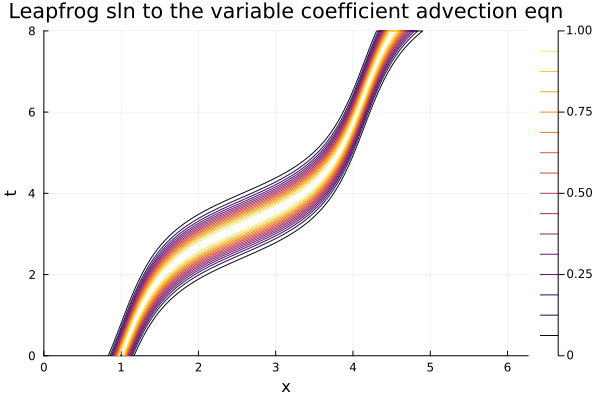

In [50]:
t = range(0,T;length=nₜ+1)
contour(x,t,u;xlabel="x",ylabel="t",title="Leapfrog sln to the variable coefficient advection eqn")

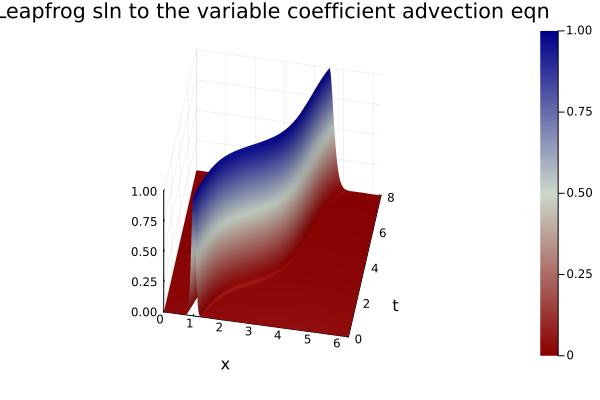

In [51]:
surface(x,t,u;seriescolor=:redsblues, camera=(10,50),
xlabel="x",ylabel="t",title="Leapfrog sln to the variable coefficient advection eqn")

## Convergence of trigonometric interpolants

What happens if we approximate a function that is not periodic with the periodic trigonometric interpolant
$$
p_n(x) = \sum_{k=-m}^{m}\tilde{c}^n_k{\rm e}^{{\rm i}kx}?
$$

### Periodic extensions

**Example** Consider the function $f(x) = {\rm e}^{x-2\pi}$. This function is not  $2\pi$-periodic because $f(x + 2\pi) \neq f(x)$. However, for any function $f$, we can construct its *periodic extension* by taking its image on $x \in [0, 2\pi)$ and making copies of it on the entire real line as follows:  Here is a plot of the periodic extension of $f$ on $[-2\pi, 4\pi)$, however it extends infinitely far to the left and right.

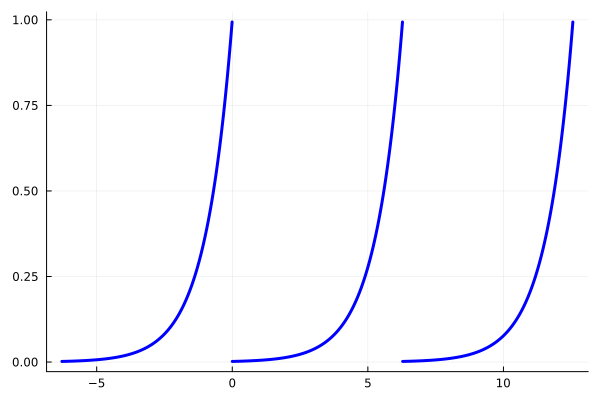

In [52]:
f₁ = x -> exp(x-2π)
xx = range(0,2π;length=1001)[1:end-1] # plotting grid
pl =plot(xx,f₁.(xx);lw=3,lc=:blue,legend=false)
plot!(xx .+ 2π,f₁.(xx);lw=3,lc=:blue,legend=false)
plot!(xx .- 2π,f₁.(xx);lw=3,lc=:blue,legend=false)

Formally, we define the periodic extension of $f$ as follows:

**Definition (periodic extension)** The periodic extension of $f(x)$ is
$$
f_p(x) :=  f(x \: (\mathrm{mod}\: 2\pi))
$$

Let's check this:

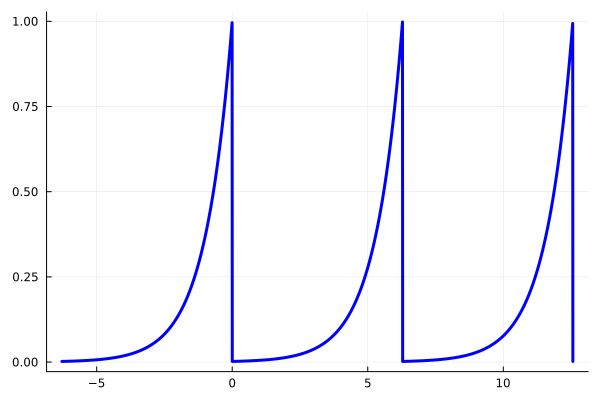

In [53]:
fₚ = x -> exp(mod(x,2π)-2π)
x = range(-2π,4π;length=3003) # plotting grid
plot(x,fₚ.(x);lw=3,lc=:blue,legend=false)

Notice that the periodic extension of $f(x) = {\rm e}^{x-2\pi}$ has jump discontinuities at $x = 2\pi p$, $p \in \mathbb{Z}$, e.g., 
$$
\lim_{x \to 2\pi^{-}} f_p(x) = 1 \neq {\rm e}^{-2\pi} = \lim_{x \to 2\pi^{+}} f_p(x).
$$

### The Gibbs phenomenon

Here is the trigonometric interpolant of the periodic extension of $f$:

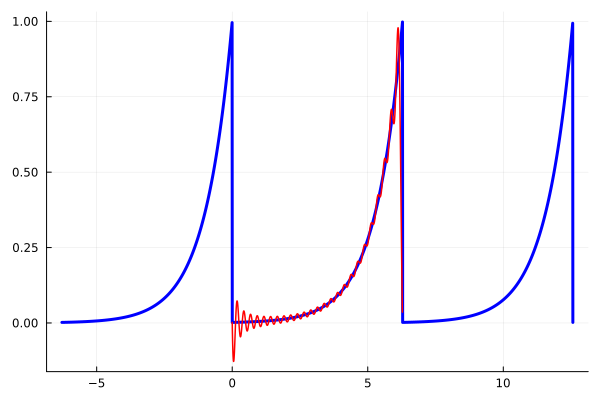

In [54]:
# Trigonometric interpolant
n = 51
x = range(0,2π;length=n+1)[1:end-1]
c = fft(f₁.(x))/n
p = x -> triginterp(c, x)
pl  
plot!(xx,real.(p.(xx)),lw=1.5,lc=:red)

The periodic interpolant is clearly not a good approximation to the function.  The oscillations at the endpoints is known as the *Gibbs phenomenon*.  As $n \to \infty$, the amplitude of the oscillations decrease as $\mathcal{O}(n^{-1})$ (very slowly) and the interpolant at $x=0$ and $x =2\pi$ converges to the average of the function values at  $x=0$ and $x =2\pi$:
$$
\lim_{x\to 0, 2\pi}p_n(x) = \frac{1}{2}\left(\lim_{x \to 0^{+}}f_p(x) + \lim_{x \to 2\pi^{-}}f_p(x)\right), \qquad n \to \infty.
$$

The reason why $p_n$ is not a good approximation to $f_p$ is because it is not very smooth (it has jump discontinuities, so it's $0$-th derivative is discontinuous). Our aim is to relate the smoothness of $f_p$ to the accuracy of its approximation by the interpolant $p_n(x)$.  Then we'll be able to relate the smoothness of derivatives of $f_p$ to the accuracy of their approximation by derivatives of the interpolant, which is relevant to the analysis of the accuracy of spectral methods for PDEs.

**Note** For the rest of this chapter, we assume that all the functions we consider are periodic extensions. If a function $f$ is $2\pi$-periodic, then $f(x) = f_p(x)$. Since most of the functions we'll be considering in the rest of this chapter are $2\pi$-periodic, we'll drop the subscript and refer to functions as $f$ (even though we are really considering $f_p(x)$).

### Accuracy of trigonometric interpolants

**Definition (infinity norm of a function)** The infinity norm of a function $g(x)$ on $[0, 2\pi]$ is 
$$
\| g \|_{\infty} = \mathrm{sup}_{x\in[0,2\pi]} \vert g(x) \vert
$$

The next result shows that the accuracy of the interpolant $p_n(x)$ and its derivatives depend on the magnitudes of the Fourier coefficients of the function $f$. 

**Proposition (trigonometric interpolant error and Fourier coefficients)** Suppose $\sum_{\vert k \vert > m} \vert k \vert^{\nu} \vert c_k \vert < \infty$, then
$$
\| f^{(\nu)} - p_n^{(\nu)}  \|_{\infty} \leq  2\sum_{\vert k \vert > m} \vert k \vert^{\nu} \vert c_k \vert 
$$

**Proof** We have that
$$
\begin{eqnarray*}
f^{(\nu)}(x) - p^{(\nu)}_n(x) & = & \sum_{k=-\infty}^{\infty}({\rm i}k)^{\nu}c_k{\rm e}^{{\rm i}kx} - \sum_{k=-m}^{m}({\rm i}k)^{\nu}\,\tilde{c}^n_k{\rm e}^{{\rm i}kx} \\
 &=& \sum_{k=-m}^{m}({\rm i}k)^{\nu}\left(c_k - \tilde{c}^n_k\right){\rm e}^{{\rm i}kx} + \sum_{\vert k \vert > m} ({\rm i}k)^{\nu}c_k{\rm e}^{{\rm i}kx}
\end{eqnarray*}
$$
Recall the aliasing formula:
$$
\tilde{c}^n_k = \cdots + c_{k-2n} + c_{k-n} +  c_k +  c_{k+n} + c_{k+2n} + \cdots
$$
therefore,
$$
\begin{eqnarray}
\left\vert f^{(\nu)}(x) - p^{(\nu)}_n(x) \right\vert & \leq &  \sum_{k=-m}^{m} \vert k\vert^{\nu}\left\vert c_k - \tilde{c}^n_k\right\vert + \sum_{\vert k \vert > m} \vert k \vert^{\nu} \vert c_k \vert \leq  2\sum_{\vert k \vert > m} \vert k \vert^{\nu} \vert c_k \vert,
\end{eqnarray}
$$
and the result follows.  $\blacksquare$

**Definition (1-norm of a function)** The 1-norm of a function $g(x)$ on $[0, 2\pi]$ is
$$
\| g \|_1 = \int_{0}^{2\pi}  \vert g(x) \vert \, {\rm d}x. 
$$

Also, we define $g(a^{-})$ as follows:
$$
g(a^{-}) :=\lim_{x\to a^{-}} g(x).
$$

The next result shows that the magnitudes of the Fourier coefficients depend on the smoothness of $f$. Loosely speaking, the result says that if the derivatives of order $0, \ldots, \mu-1$ are continuous and integrable (they are "nice") and the derivatives of order $\mu$ and $\mu+1$ are absolutely integrable (but not necessarily periodic or continuous, i.e., not so nice but not too wild), then $c_k = \mathcal{O}(k^{-\mu-1})$, i.e., the Fourier coefficients decay as $\mathcal{O}(k^{-\mu-1})$, as $k \to \infty$.

**Proposition (Smoothness of $f$ and decay of Fourier coefficients)** Suppose the periodic extension of a function $f$ is in $C^{(\mu-1)}[0, 2\pi]$ (i.e., the order $0$-th up to $\mu-1$-st derivatives of the periodic extension of $f$ are continuous on $[0, 2\pi]$; note that continuity on $[0, 2\pi]$ implies $2\pi$-periodicity) and suppose $\left\| f^{(k)} \right\|_{1} < \infty$ for $k = 0, \ldots, \mu+1$ and $f^{(\mu)}(0), f^{(\mu)}(2\pi^{-}) < \infty$, then
$$
\left\vert c_k   \right\vert \leq  \frac{M}{2\pi \vert k \vert^{\mu+1}},
$$
where $M =  \vert f^{(\mu)}(2\pi^{-}) - f^{(\mu)}(0)   \vert + \left\|f^{(\mu+1)}   \right\|_1$.

**Proof** Integrating by parts $\mu+1$ times, it follows that
$$
\begin{eqnarray*}
c_k &=& \frac{1}{2\pi}\int_{0}^{2\pi}f(x) {\rm e}^{-{\rm i}kx}{\rm d}x  \\
    &=& \frac{1}{2\pi(-{\rm i}k)}\left\lbrace \left.  f(x) {\rm e}^{-{\rm i}kx}\right]_{0}^{2\pi^{-}}  - \int_{0}^{2\pi}f'(x) {\rm e}^{-{\rm i}kx} {\rm d}x \right\rbrace \\
    &=& \frac{1}{2\pi({\rm i}k)} \int_{0}^{2\pi}f'(x) {\rm e}^{-{\rm i}kx} {\rm d}x \\
    &\vdots &   \\
    & = &  \frac{1}{2\pi({\rm i}k)^{\mu-1}(-{\rm i}k)}\left\lbrace \left.  f^{(\mu-1)}(x) {\rm e}^{-{\rm i}kx}\right]_{0}^{2\pi^{-}}  - \int_{0}^{2\pi}f^{(\mu)}(x) {\rm e}^{-{\rm i}kx} {\rm d}x \right\rbrace \\
    &=& \frac{1}{2\pi({\rm i}k)^{\mu}} \int_{0}^{2\pi}f^{(\mu)}(x) {\rm e}^{-{\rm i}kx} {\rm d}x \\
    &=& \frac{1}{2\pi({\rm i}k)^{\mu}(-{\rm i}k)}\left\lbrace \left.  f^{(\mu)}(x) {\rm e}^{-{\rm i}kx}\right]_{0}^{2\pi^{-}}  - \int_{0}^{2\pi}f^{(\mu+1)}(x) {\rm e}^{-{\rm i}kx} {\rm d}x \right\rbrace,
    \end{eqnarray*}
$$
from which the result follows.
$\blacksquare$

**Corollary 1: (Accuracy of the trigonometric interpolant and its derivatives)**  If the conditions of the above proposition hold, then
$$
\| f^{(\nu)} - p_n^{(\nu)} \|_{\infty} = \mathcal{O}(n^{\nu-\mu}), \qquad n \to \infty.
$$

**Proof** Let $M  = \vert f^{(\mu)}(2\pi^{-}) - f^{(\mu)}(0)   \vert + \left\|f^{(\mu+1)}   \right\|_1$, then we have that
$$
\begin{eqnarray*}
\| f^{(\nu)} - p^{(\nu)}  \|_{\infty} & \leq  & 2\sum_{\vert k \vert > m} \vert k \vert^{\nu} \vert c_k \vert  \\
& \leq & \frac{M}{\pi } \sum_{\vert k \vert > m} \vert k \vert^{\nu-\mu-1} \\
& = & \frac{2M}{\pi } \sum_{ k = m+1}^{\infty}  k^{\nu-\mu-1} \\
& \leq & \frac{2M}{(\nu-\mu)\pi  } m^{\nu-\mu}
\end{eqnarray*}
$$
where used the fact that
$$
\sum_{k = m+1}^{\infty}  \frac{1}{k^{p+1}}  \leq \int_{m}^{\infty} \frac{1}{k^{p+1}}{\rm d}k = \frac{1}{pk^p}.
$$
Hence, the result follows upon setting $n = 2m + 1$ and recalling the definition of big-O notation.   $\blacksquare$

**Corollary 2: (accuracy of the approximate Fourier coefficients)** If the conditions of the above proposition hold, then
$$
c_k - \tilde{c}^n_{k} = \mathcal{O}\left( n^{-\mu-1} \right), \qquad n \to \infty,
$$
where $k = -m, \ldots, m$ and $n = 2m + 1$.

**Proof sketch** Since
$$
\vert \tilde{c}^n_k - c_k \vert \leq  \sum_{\substack{p=-\infty\\ p\neq 0}}^{\infty} \vert c_{k+pn} \vert \leq  \frac{M}{2\pi} \sum_{\substack{p=-\infty\\ p\neq 0}}^{\infty}  \frac{1}{\vert k + pn \vert^{\mu+1}}
$$
where $M  = \vert f^{(\mu)}(2\pi^{-}) - f^{(\mu)}(0)   \vert + \left\|f^{(\mu+1)}   \right\|_1$,  the result follows by showing that
$$
\sum_{\substack{p=-\infty\\ p\neq 0}}^{\infty}  \frac{1}{\vert k + pn \vert^{\mu+1}} = \mathcal{O}(n^{-\mu-1}), \qquad n \to \infty.
$$
$\blacksquare$

As an aside, the sum 
$$
\sum_{\substack{p=-\infty\\ p\neq 0}}^{\infty}  \frac{1}{\vert k + pn \vert^{\mu+1}}
$$
can be expressed in terms of a special function called the Hurwitz zeta function, which is a generalisation of the Riemann zeta function.  For odd $\mu$, the sum can be expressed in terms of trigonometric functions.  For example, for $k \neq 0$, and $\mu = 1$
$$
    \sum_{p=-\infty}^{\infty} \frac{1}{(k+np)^2} = \frac{\pi^2\csc^2(k\pi/n) }{n^2},
$$
which can be proved by using (for example) the residue theorem from complex analysis.

An immediate consequence of Corollary 2 is that the approximate Fourier coefficients $\tilde{c}^n_k$ decay at the same rate as the exact Fourier coefficients $c_k$, i.e., $\tilde{c}^n_k = \mathcal{O}(n^{-\mu-1})$, $n \to \infty$.

**Examples**  
1. For the non-periodic function we considered before, $f(x) = {\rm e}^{x-2\pi}$, we have $\mu = 0$ because none of the derivatives of its periodic extension (even the $0$-th order derivative) are continuous.  However, $\| f^{(k)} \|_{1} < \infty$ for $k = 0, 1$ (verify) and $f(0), f(2\pi^{-}) < \infty$, therefore, we expect its Fourier coefficients to decay at the algebraic rate $c_k = \mathcal{O}(k^{-1})$. This is indeed the case because
$$
c_{k} = \frac{{\rm e}^{-2\pi}}{2\pi}\int_{0}^{2\pi} {\rm e}^{x(1-{\rm i}k)}{\rm d}x = \frac{{\rm e}^{-2\pi}}{2\pi } \left. \frac{{\rm e}^{x(1-{\rm i}k)}}{1-{\rm i}k}   \right]_{0}^{2\pi} = \frac{1 - {\rm e}^{-2\pi}}{2\pi(1-{\rm i}k)}
$$
2. For the function $f(x) = \vert \sin(x) \vert$, the conditions of the above proposition are satisfied for $\mu = 1$ (verify) and therefore we expect its exact and approximate Fourier coefficients to decay at the rate $\mathcal{O}(k^{-2})$, $k \to \infty$.
3. For the function $f(x) = \vert \sin(x) \vert \sin(x)$, the conditions of the above proposition are satisfied for $\mu = 2$ (verify) and therefore we expect its exact and approximate Fourier coefficients to decay at the rate $\mathcal{O}(k^{-3})$, $k \to \infty$.
4. The function $f(x) = {\rm e}^{-1/\sin^2(x/2)} \in C^{\infty}[0, 2\pi]$  and therefore we expect its exact and approximate Fourier coefficients to decay faster than $\mathcal{O}(k^{-\mu-1})$ as $k \to \infty$ *for all* $\mu > 0$.

Let's check numerically that the approximate Fourier coefficients decay at their predicted rates for the functions above:

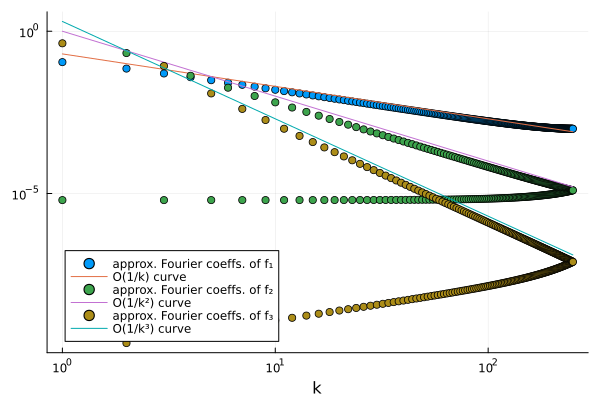

In [55]:
n = 501
m = (n-1)÷2
x = range(0,2π;length=n+1)[1:end-1]

c = fftshift(fft(f₁.(x)))/n   # f₁ = exp(x - 2π)
# plot the magnitudes of the approximate Fourier coefficients c_1, c_2, …, c_m 
scatter(1:m,abs.(c[m+2:end]); 
yscale=:log10,xscale=:log10,xlabel="k",label="approx. Fourier coeffs. of f₁")
plot!(1:m,0.2 ./(1:m),label="O(1/k) curve")

f₂ = x -> abs(sin(x))
c₂ = fftshift(fft(f₂.(x)))/n
scatter!(1:m,abs.(c₂[m+2:end]),label="approx. Fourier coeffs. of f₂")
plot!(1:m,1 ./((1:m).^2),label="O(1/k²) curve")

f₃ = x -> sin(x)*abs(sin(x))
c₃ = fftshift(fft(f₃.(x)))/n
scatter!(1:m,abs.(c₃[m+2:end]),label="approx. Fourier coeffs. of f₃")
p =plot!(1:m,2 ./((1:m).^3),label="O(1/k³) curve",legend=:bottomleft)

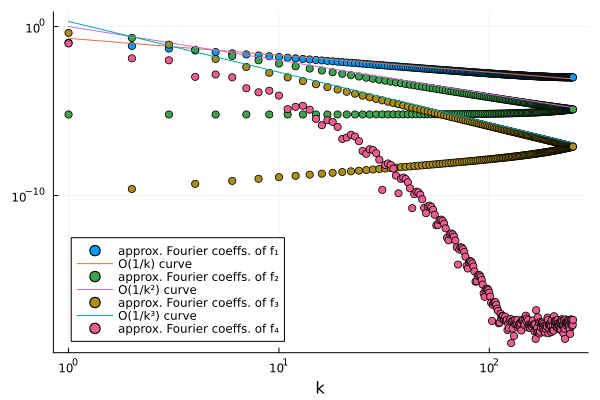

In [56]:
p
f₄ = x -> exp(-1/sin(x/2)^2)
c₄ = fftshift(fft(f₄.(x)))/n
scatter!(1:m,abs.(c₄[m+2:end]),label="approx. Fourier coeffs. of f₄",legend=:bottomleft)

Functions whose periodic extensions  are analytic on $[0, 2\pi]$ are even smoother than functions in $C^{\infty}[0, 2\pi]$ and consequently their Fourier coefficients decay even faster.

**Definition (analytic function)** A function $f(x)$ is analytic on a region $\Omega$ (think of a real interval $[a, b] \in \mathbb{R}$ or a region in the complex plane for those who have studied complex analysis) if its Taylor series has a positive radius of convergence for every $x \in \Omega$.

The Fourier coefficients of functions that are analytic on $[0, 2\pi]$ decay *exponentially* fast.  To prove this and to quantify the rate of convergence, one needs to use techniques from complex analysis.  Since complex analysis is not a pre-requisite for this module, we won't prove this result.  Another fact that is proven in complex analysis is that the derivatives of analytic functions are also analytic functions! Here are two consequences:
1. If $f$ is analytic on $[0, 2\pi]$, then the approximate Fourier coefficients $\tilde{c}^n_k$ converge exponentially fast to the exact Fourier coefficients $c_k$ of $f$ as $n \to \infty$.   
2. The trigonometric interpolant and its derivatives converge exponentially fast with $n$ to $f$ and its derivatives if $f$ is analytic.

A function $f(x)$ is called an *entire function* if it is analytic on the entire complex plane (it is analytic for all $x \in \mathbb{C}$); $f(x) = {\rm e}^{\cos x}$ is an example of a $2\pi$-periodic function that is entire (${\rm e}^{x}$ is an entire function, however its periodic extension is *not* entire). The Fourier coefficients of entire functions decay at a *super-exponential* rate.

A function $f(x)$ with $c_{k} = 0$ for $\vert k \vert > N$, where $N$ is a non-negative integer, is called a *band-limited* function; $\cos x$ and $\sin x$ are examples of band-limited functions because $c_{k} = 0$ for $\vert k \vert > 1$.

Here is an example of the decay of the approximate Fourier coefficients of a function in $C^{\infty}[0, 2\pi]$, an analytic function and an entire function. Note the plot below is on a semi-logarithmic scale.

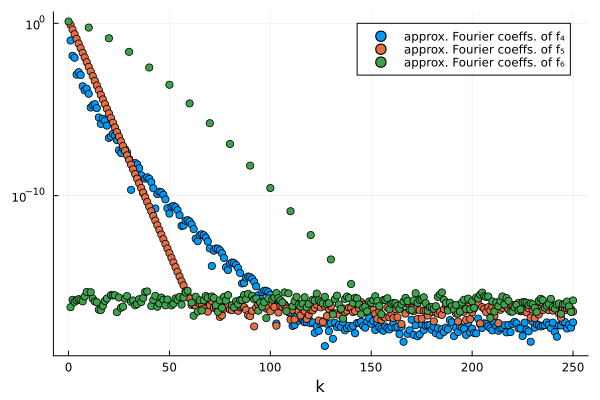

In [57]:
# A function in C\^∞[0, 2π]
scatter(1:m,abs.(c₄[m+2:end]),xlabel="k",
yscale=:log10,label="approx. Fourier coeffs. of f₄")
# An analytic function
f₅ = x -> 1/(1.2 - sin(x))
c₅ = fftshift(fft(f₅.(x)))/n
scatter!(1:m,abs.(c₅[m+2:end]),label="approx. Fourier coeffs. of f₅")
# An entire function
f₆ = x -> exp(cos(10x))
c₆ = fftshift(fft(f₆.(x)))/n
scatter!(0:m,abs.(c₆[m+1:end]),label="approx. Fourier coeffs. of f₆")

Here are the approximate Fourier coefficients of a band-limited function:

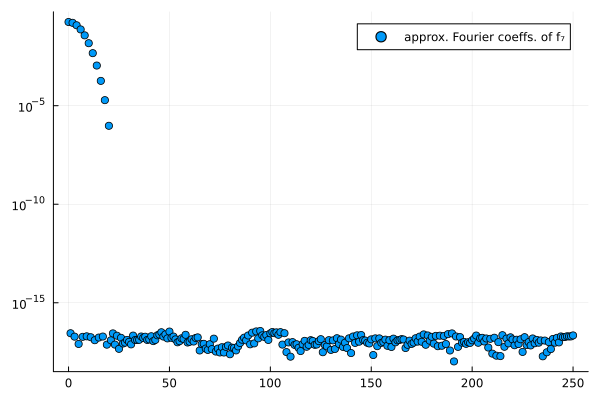

In [58]:
# A band-limited function
f₇ = x -> cos(x)^20
c₇ = fftshift(fft(f₇.(x)))/n
scatter(0:m,abs.(c₇[m+1:end]),label="approx. Fourier coeffs. of f₇",yscale=:log10)